# Data Analysis

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Read the file

In [175]:
df = pd.read_csv('train.csv')

## Drop absolute unnecessary columns

In [176]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

## Imbalance check

transform the satisfaction string category to numerical category for the imbalance check

In [177]:
df['satisfaction'] = df.satisfaction.apply(lambda x: int(1) if x == 'satisfied' else int(0))

the percentage for satisfaction data

In [178]:
print(df.satisfaction.value_counts()/len(df.satisfaction))

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64


###### the data are balance enough, so the data don't need to be resampling

## Not Available data analysis

In [179]:
NA_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

the percentage of the NA data

In [180]:
print(df[NA_columns].isnull().sum()/ len(df[NA_columns]))

Arrival Delay in Minutes    0.002984
dtype: float64


see the NA_columns distribution

array([[<AxesSubplot:title={'center':'Arrival Delay in Minutes'}>]],
      dtype=object)

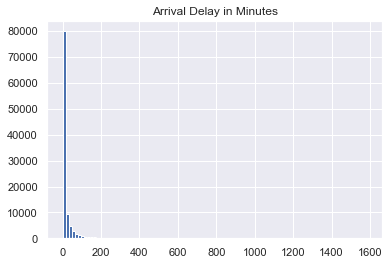

In [181]:
df[NA_columns].hist(bins=100)

###### the distribution very right skewed cause the modus of this columns is 0

see the effect of the nan with the satisfaction, compare to the non nan

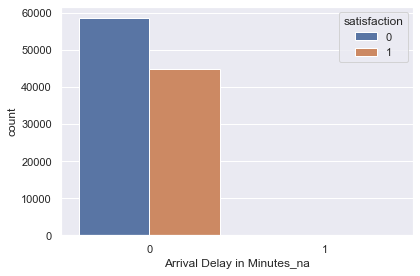

In [182]:
for col in NA_columns:
    df[col + '_na'] = np.where(df[NA_columns].isnull(), 1, 0)
    sns.countplot(col + '_na', data=df, hue='satisfaction' )
    plt.tight_layout()

cause the nan percentage are very small, so I plot the nan here to see the effect

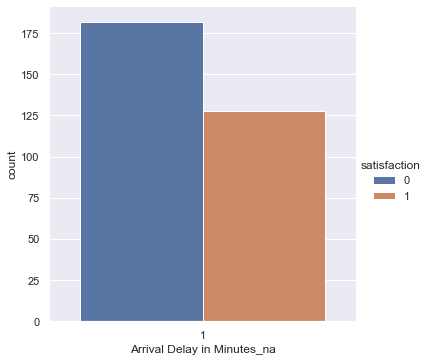

In [183]:
nan_data = df[(df['Arrival Delay in Minutes_na'] == 1)]
sns.catplot('Arrival Delay in Minutes_na', data=nan_data, kind='count', hue='satisfaction' )

###### the plot showed that the nan value is sligthly affect the satisfaction, or even not affecting at all cause the satisfaction percentage are the same in non nan and nan.

drop the 'Arrival Delay in Minutes_na' column

In [184]:
df.drop('Arrival Delay in Minutes_na', axis=1, inplace=True)

## Numeric Columns Analysis

In [185]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']

in the numeric column, there are two types, discrete and continuous. here I Extract the discrete numeric columns with threshold unique data < 10

### Discrete Numeric Columns

In [186]:
num_columns_discrete = [column for column in num_columns if len(df[column].unique()) <= 10 and column not in ['satisfaction']]

the num_columns _discrete is appropriate according to the dataset as service satisfaction value in each columns

transform data 0 (Not Applicable) to mode in each columns

In [188]:
for col in num_columns_discrete:
    modus_value = str(df[col].mode()[0])
    df[col] = df[col].astype(str).apply(lambda x: x.replace('0', modus_value))
    df[col] = df[col].astype(int)

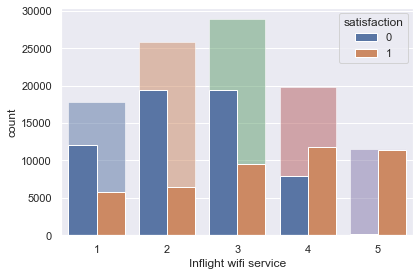

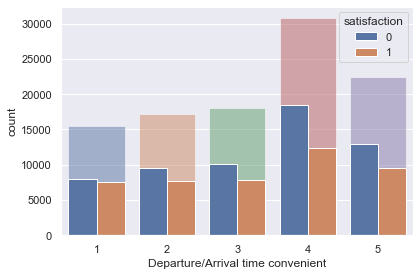

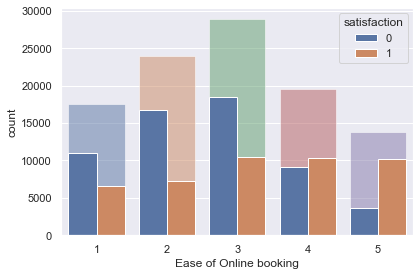

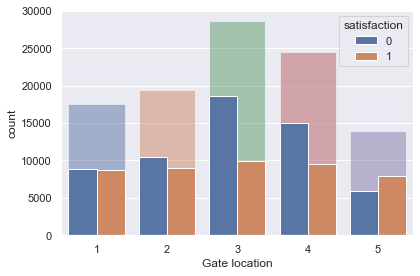

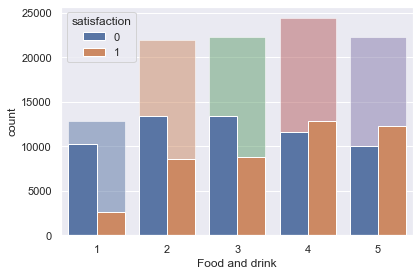

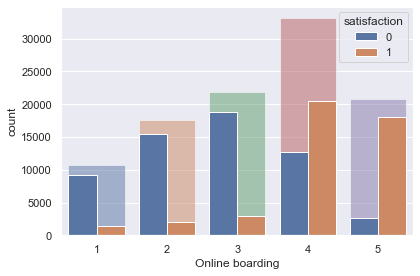

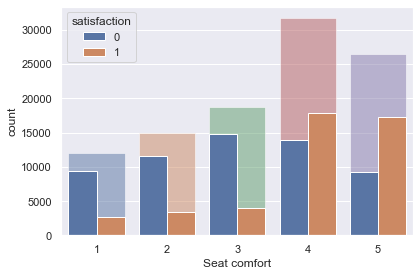

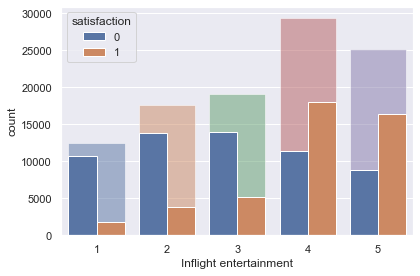

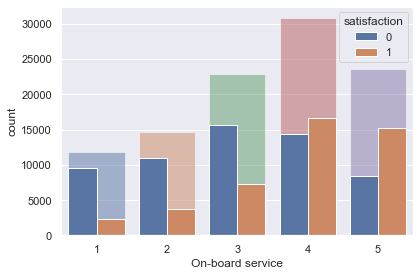

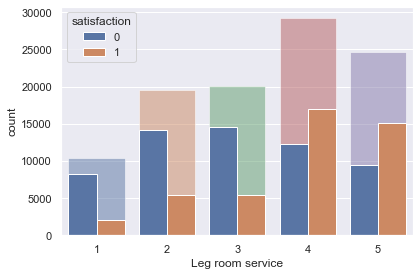

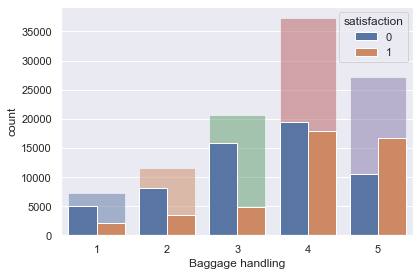

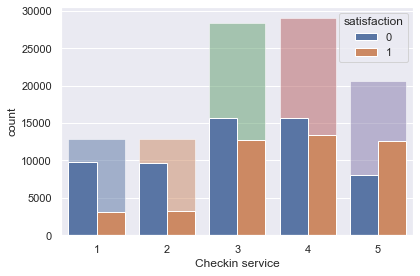

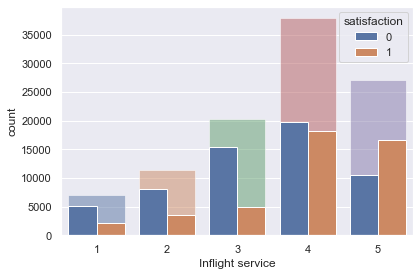

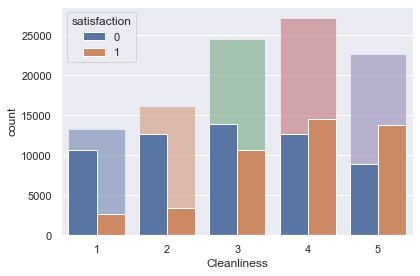

In [190]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(col, data=df, alpha=0.5)
    sns.countplot(col, data=df, hue='satisfaction')
    plt.tight_layout()

###### inflight wifi service most of the data are in 2 and 3 point and end up a lot dissatisfied, it happens also in ease of online booking, gate location . departure/arrival time are in good trends but not lead to the satisfaction of the airline. Food and drink seems neutral and not impresive . Online boarding, seat comfort, inflight entertaintment, on-board-service, leg room service, cleanliness are in the good shape with the most of the data in point 4 and the trends lead to the satisfaction of the airline. Baggage handling, checkin service and inflight service are slightly like departure/arrival time but still got a lot satisfaction in point 5

###### so in summary inflight wifi service, online booking and gate location need big improvement for better overall service performance.

###### Food and drink, baggage handling, checkin service and inflight service just need little improvement cause they already have the good trends

###### and big question mark for the departure/arrival time convenient, why they have good trends but end up in dissatisfaction.

### Continuous Numeric Columns

In [191]:
num_columns_continue = [column for column in num_columns if column not in num_columns_discrete and column not in ['satisfaction']] 

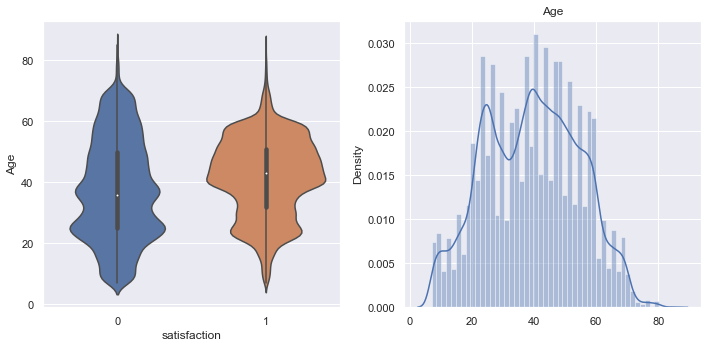

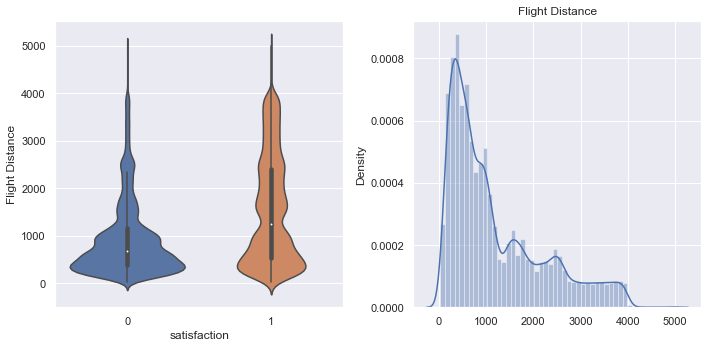

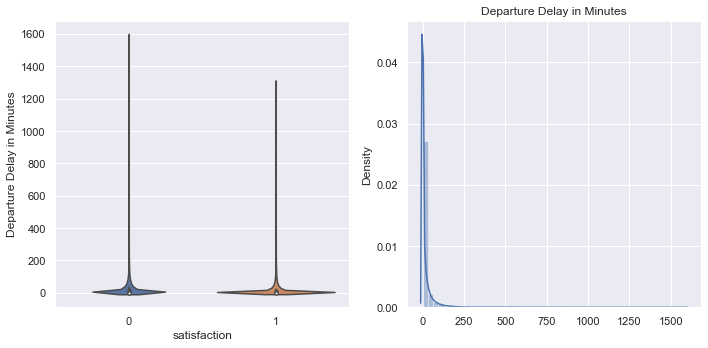

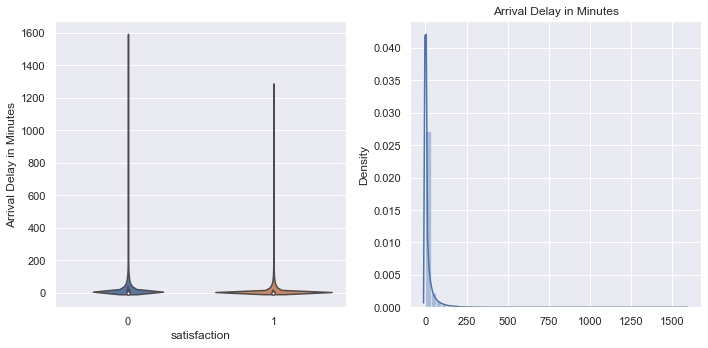

In [192]:
for col in num_columns_continue:
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.violinplot(y=col, data=df, x='satisfaction', ax=axs[0])
    plt.title(col + ' and satisfaction')
    sns.distplot(x=df[col], ax=axs[1])
    plt.title(col)
    plt.tight_layout()

###### Age < 40 and age > 60 tend to not satisfied, while age range for 40 - 60 tend to be satisifed with the airlines. In short range flight distance the passenger tend to be not satisfied while at the more long range tend to be satisfied. In arrival and departure delay, the shorter delay tend to be satisfied the passenge.

## Categorical columns analysis

In [193]:
cat_columns = [column for column in df.columns if column not in num_columns]

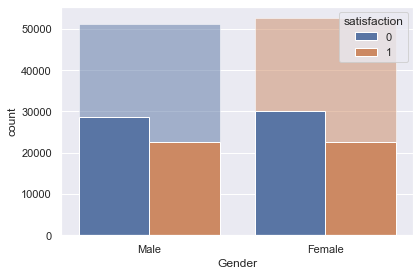

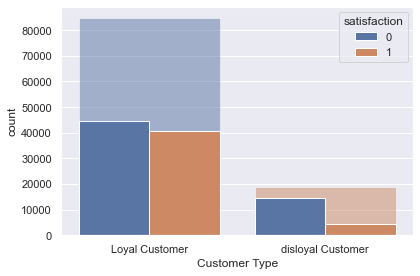

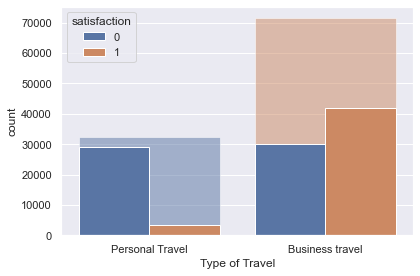

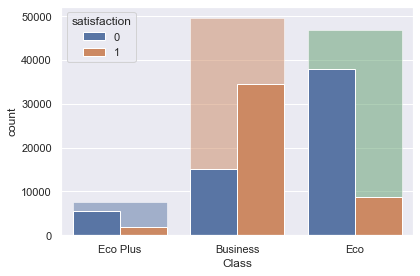

In [194]:
for col in cat_columns:
    plt.figure()
    sns.countplot(col, data=df, alpha=0.5)
    sns.countplot(col, data=df, hue='satisfaction')
    plt.tight_layout()

###### For the gender and customer type, the data shows that they are less important for the overall satisfaction. The passenger of business class and type shows that they are tend to be satisfied. and the eco class shows the worst percentage of the passenger to not to be satisfied with the airline.

## Check the correlation between columns in the data

In [195]:
print(num_columns_discrete)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [196]:
print(num_columns_continue)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [197]:
print(cat_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class']


### Correlation with the gender

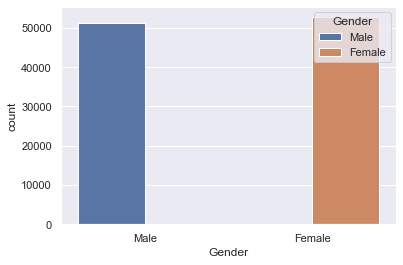

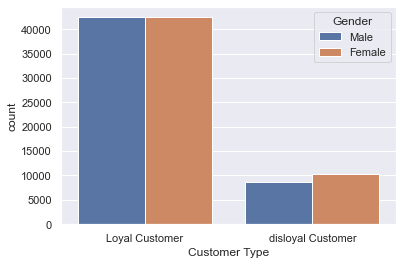

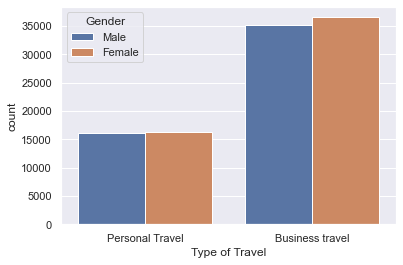

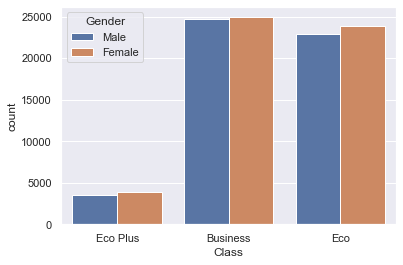

In [198]:
for col in cat_columns :
    plt.figure()
    sns.countplot(data=df, x=col, hue='Gender')

###### the gender seem balance, therefore gender is less essential for the another categorical columns

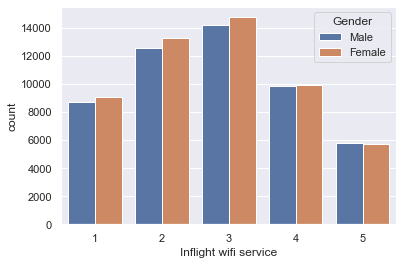

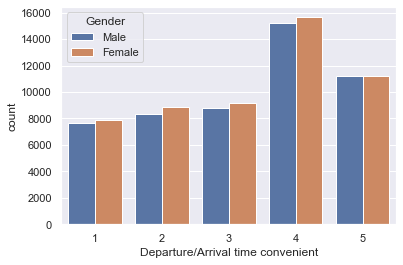

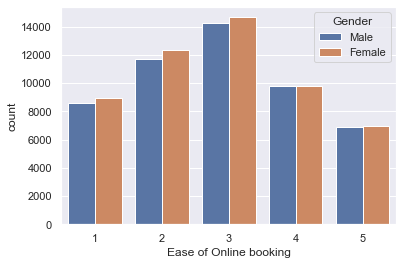

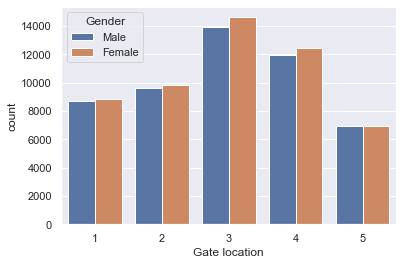

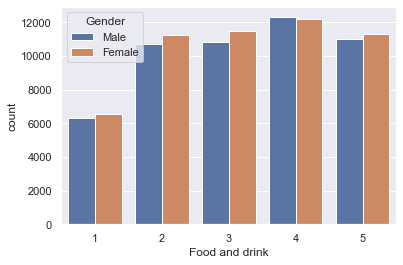

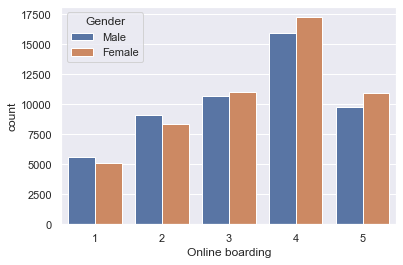

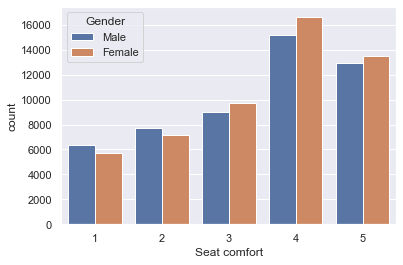

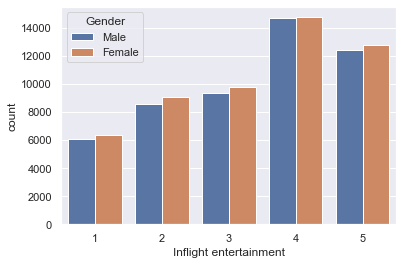

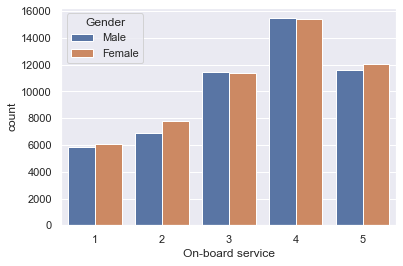

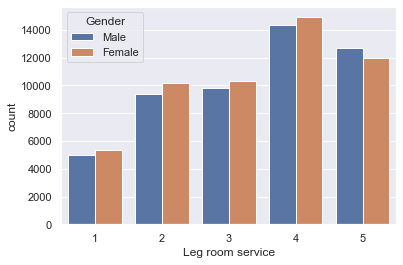

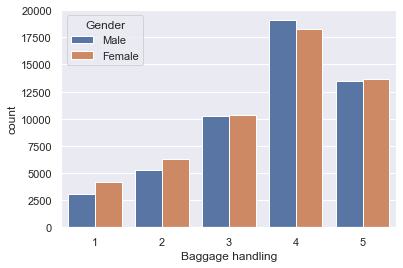

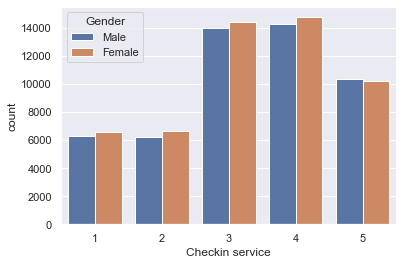

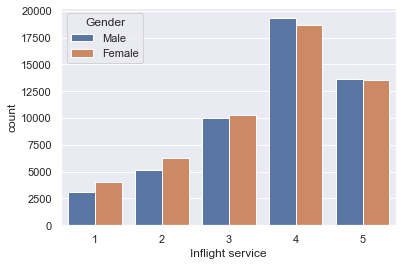

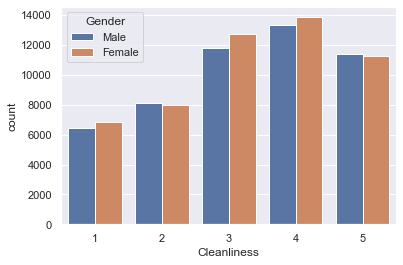

In [199]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Gender')

###### its also the same for the numerical discrete columns, which is the gender is the less important factor 

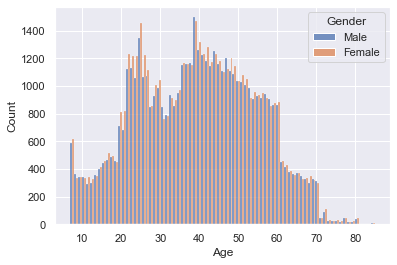

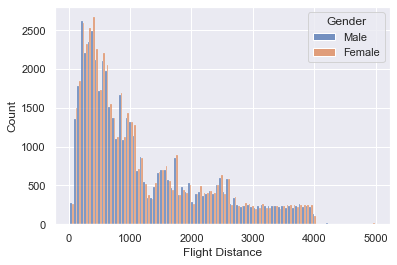

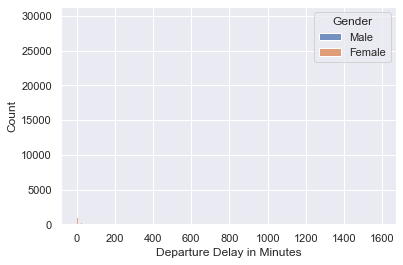

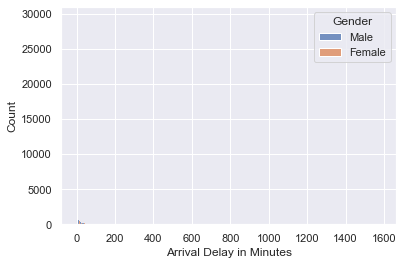

In [200]:
for col in num_columns_continue:
    plt.figure()
    sns.histplot(data=df, x=col, hue='Gender', multiple='dodge')

###### yeah its the same result, no correlation

### Correlation with the age

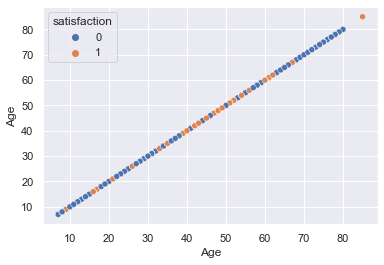

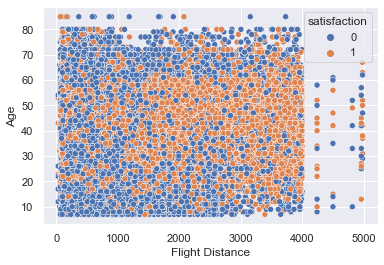

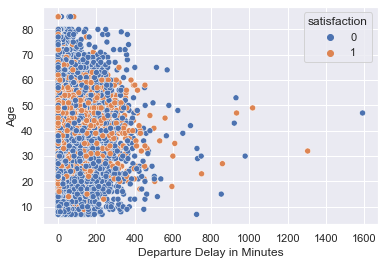

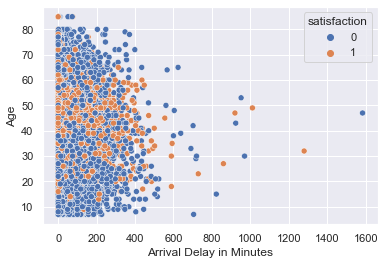

In [201]:
for col in num_columns_continue:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='Age', hue='satisfaction')

###### there is no correlation here

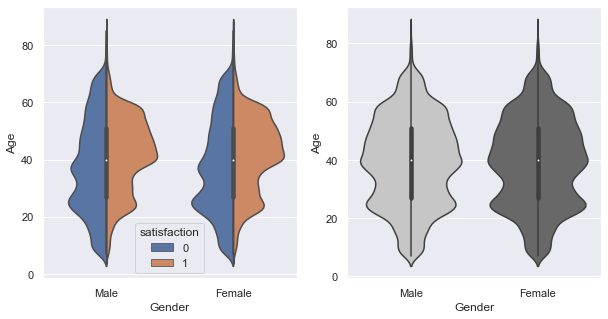

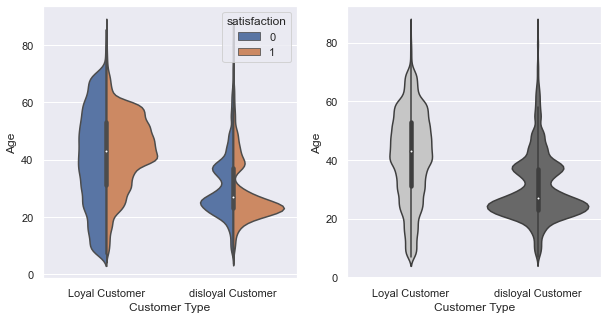

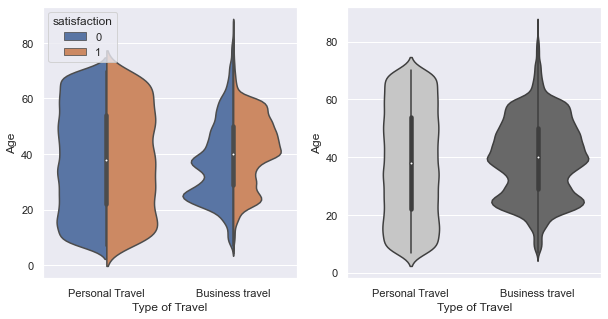

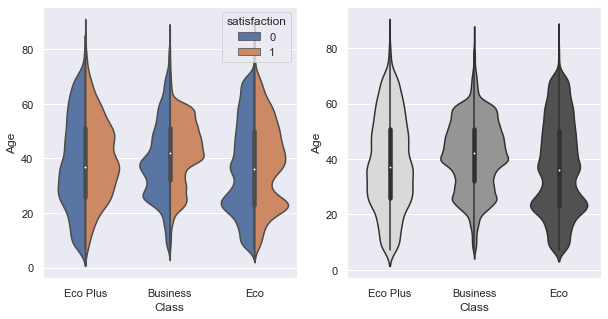

In [202]:
for col in cat_columns:
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.violinplot(data=df, x=col, y='Age', hue='satisfaction', ax=axs[0], split=True)
    sns.violinplot(data=df, x=col, y='Age', ax=axs[1], palette='Greys')

###### Gender for the age are completely the same, less important. the passenger with age > 40 tend to be loyal and satisfied with the airline, while passenger with the younger age tend to be disloyal but satisfied with the airline. again the passenger with age over 40 dominance the business travel type of travel and tend to be satisfied with the airline. eco plus and eco dominance by the younger passenger, < 20, with tend to be not satisfied, while bussiness class are dominance by the older passenger, with age over 40 years and tend to be satisfied with the airline. 

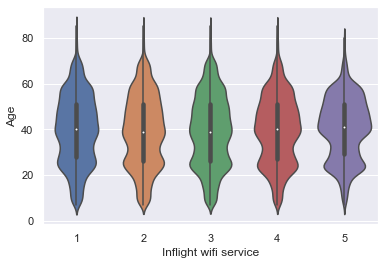

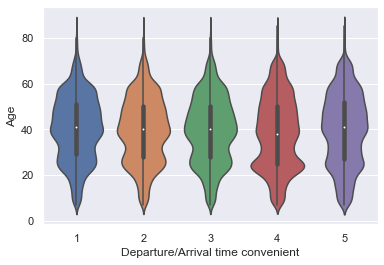

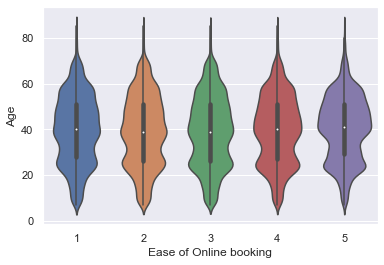

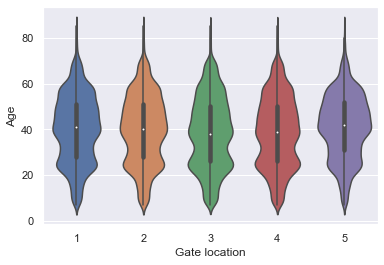

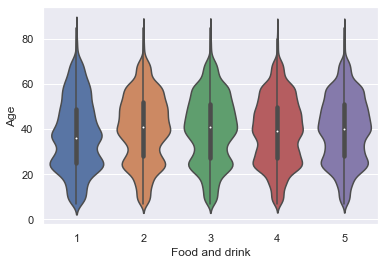

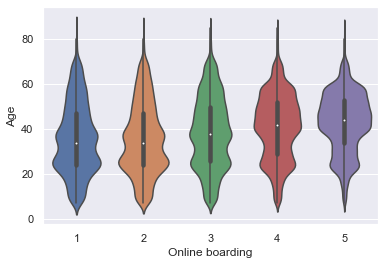

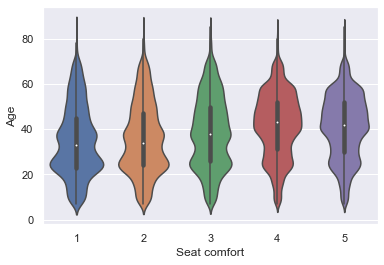

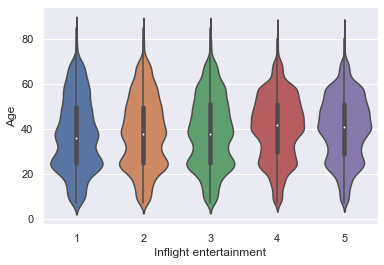

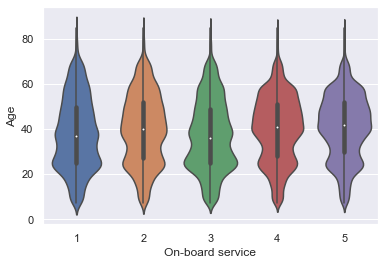

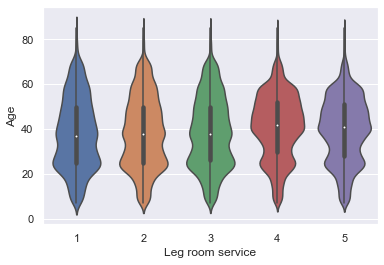

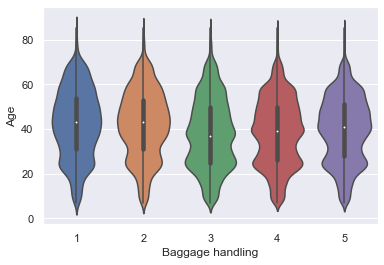

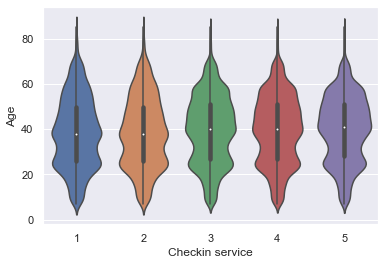

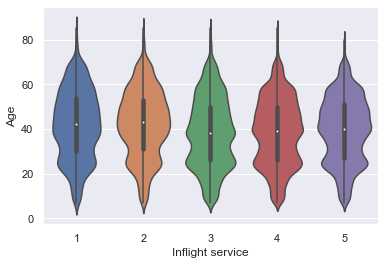

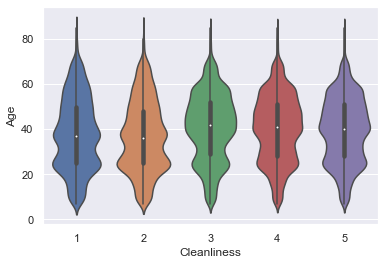

In [203]:
for col in num_columns_discrete:
    plt.figure()
    sns.violinplot(data=df, x=col, y='Age')

###### online boarding, seat comfort, inflight entertainment, on-board service, leg room service are dominant to provide the good service for older people, age 40 - 60. and Baggage handling tend to be bad service for the older people

### Another Table correlation information

<AxesSubplot:xlabel='Class', ylabel='count'>

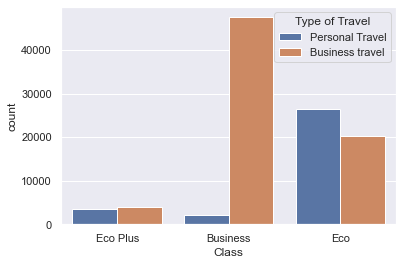

In [206]:
sns.countplot(data=df, x='Class', hue='Type of Travel')

<AxesSubplot:xlabel='Type of Travel', ylabel='Flight Distance'>

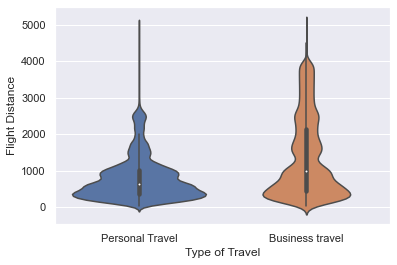

In [215]:
sns.violinplot(data=df, x='Type of Travel', y='Flight Distance')

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

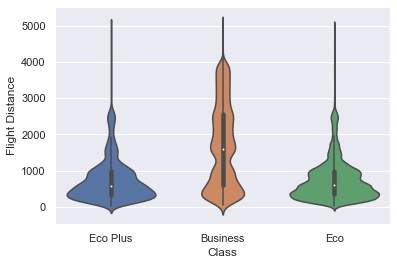

In [212]:
sns.violinplot(data=df, x='Class', y='Flight Distance')

###### Business class are dominant by the business type of travel with long range filght distance

## Conclussion

#### The Airlines passenger satisfaction are dominanth by the older people within range of the age between 40 - 60 for the business travel using business class wihtin long flying range distance, which supported and reinforced by good services score for older people like seat comfort, on-board service and leg room.